<a href="https://colab.research.google.com/github/Alfianfakh/Data-Sience-and-Analysis/blob/main/VGS-EDA/VidioGameSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go


# ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


#ML models
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Preview Data**

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

- Rank - Ranking of overall sales

- Name - The games name

- Platform - Platform of the games release (i.e. PC,PS4, etc.)

- Year - Year of the game's release

- Genre - Genre of the game

- Publisher - Publisher of the game

- NA_Sales - Sales in North America (in millions)

- EU_Sales - Sales in Europe (in millions)

- JP_Sales - Sales in Japan (in millions)

- Other_Sales - Sales in the rest of the world (in millions)

- Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Machine Learning/Data Set/datatubes.csv')
df.head()
df.shape

(16598, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## **Check Duplication**

In [ ]:
len(df)-len(df.drop_duplicates())

0

# **Data Preprocessing**

In [ ]:
# menghapus nilai yang benilai null/kosong
df.dropna(inplace=True)
df['Year']=df['Year'].astype(int)

In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# **EDA (Exploration Data Analyst**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


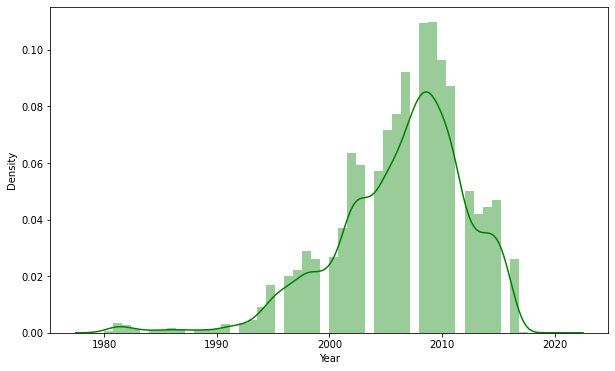

In [ ]:
ax=plt.figure(figsize=(10,6))
sns.distplot(df['Year'],color='green')

**Sales of different genre in North America**

Text(0.5, 1.0, 'Sales of different genre in North America')

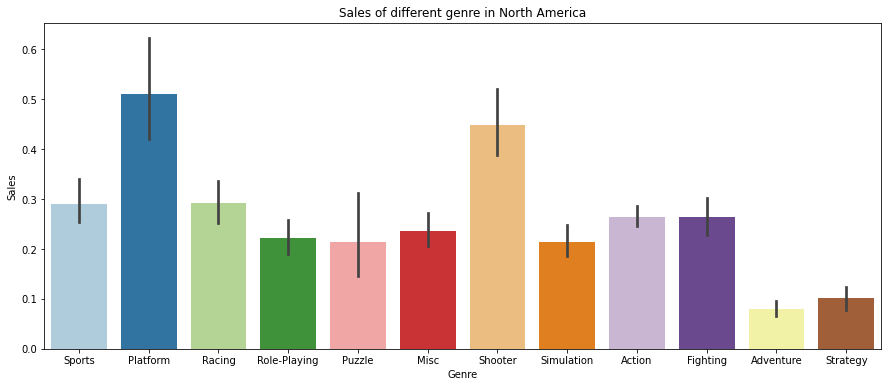

In [ ]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='NA_Sales',data=df,palette='Paired')
plt.ylabel('Sales')
plt.title('Sales of different genre in North America')

**Sales of different genre in Europe**

Text(0.5, 1.0, 'Sales of different genre in Europe')

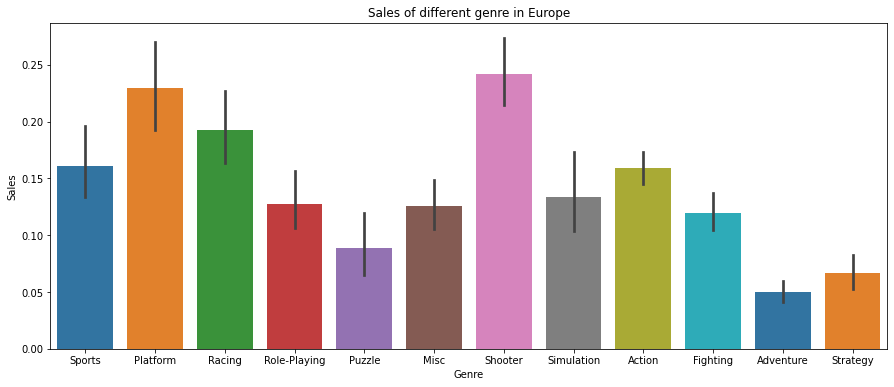

In [ ]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='EU_Sales',data=df,palette='tab10')
plt.ylabel('Sales')
plt.title('Sales of different genre in Europe')

**Sales of different genre in Japan**

Text(0.5, 1.0, 'Sales of different genre in Japan')

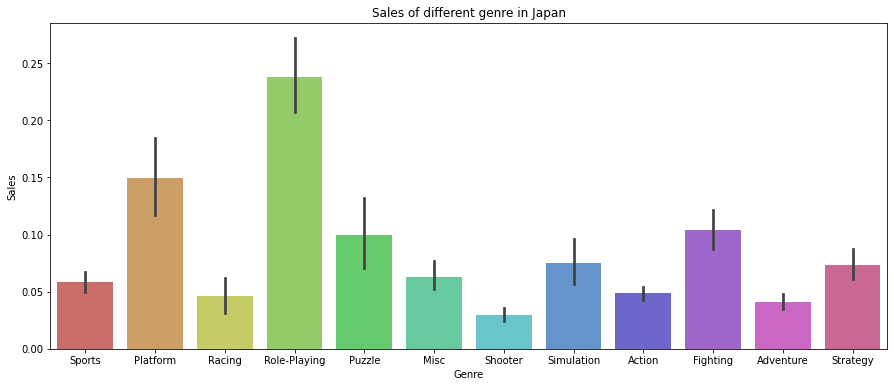

In [ ]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='JP_Sales',data=df,palette='hls')
plt.ylabel('Sales')
plt.title('Sales of different genre in Japan')

**Sales of different genre in other Regions**

Text(0.5, 1.0, 'Sales of different genre in other Regions')

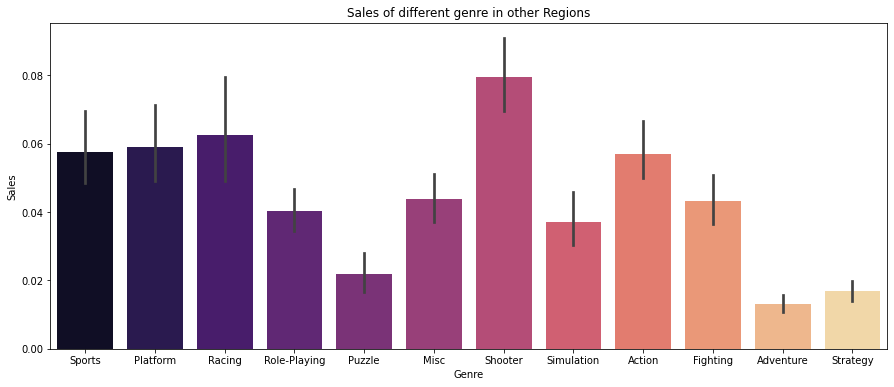

In [ ]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='Other_Sales',data=df,palette='magma')
plt.ylabel('Sales')
plt.title('Sales of different genre in other Regions')

**Sales of different genre Globally**

Text(0.5, 1.0, 'Sales of different genre Globally')

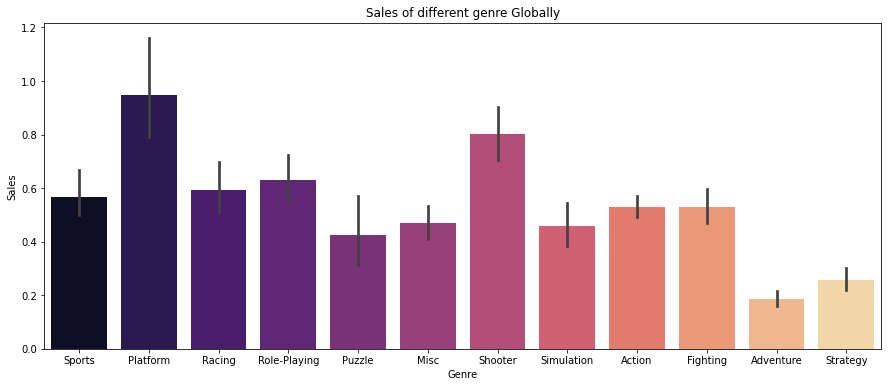

In [ ]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='Global_Sales',data=df,palette='magma')
plt.ylabel('Sales')
plt.title('Sales of different genre Globally')

dari Visualisasi diatas Game platform dan penembak adalah genre game yang paling banyak dimainkan secara global

--------------------------------------------------------------------------------------------------------

Rilis game 5 tahun teratas berdasarkan genre

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

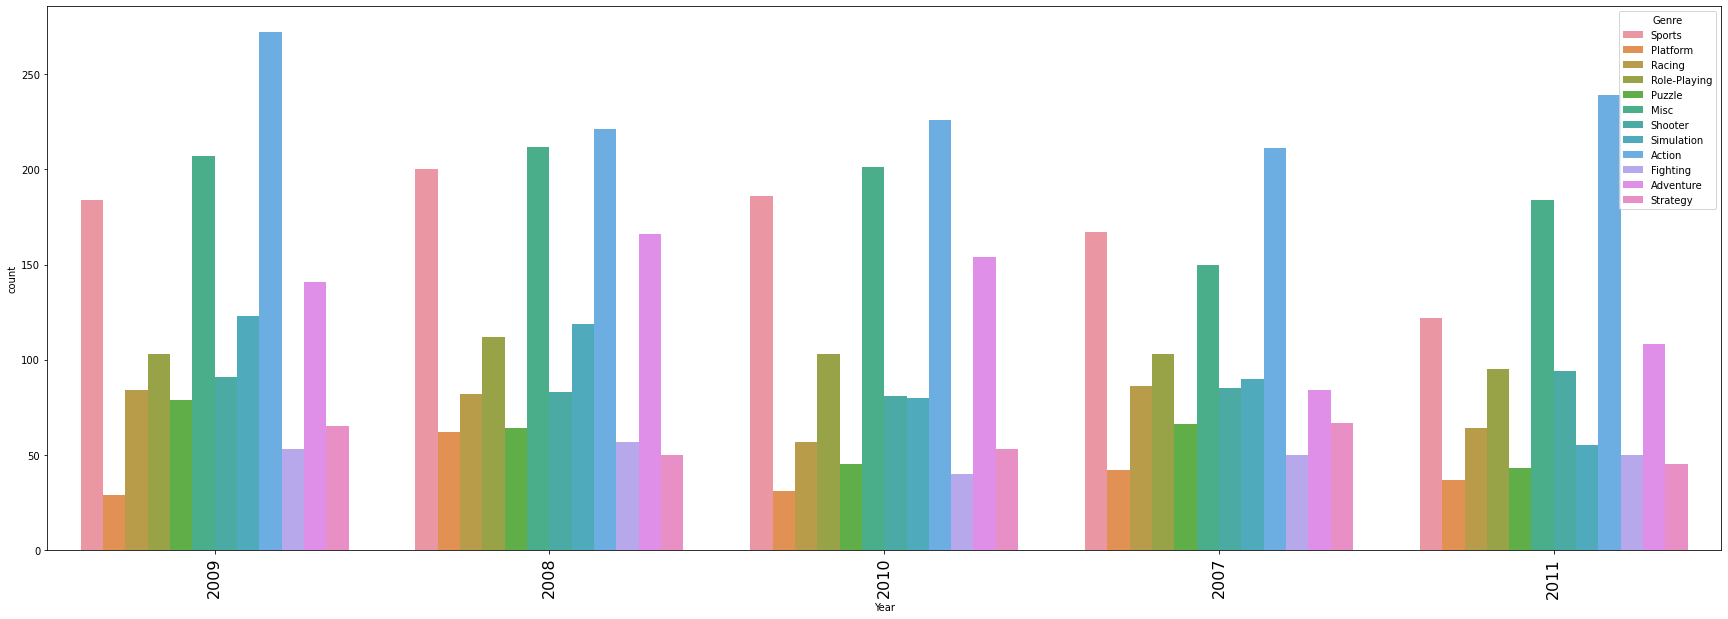

In [ ]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=df, hue='Genre', order=df.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

Frekuensi Genre yang berbeda

Text(0.5, 1.0, 'Frequency of different Genre')

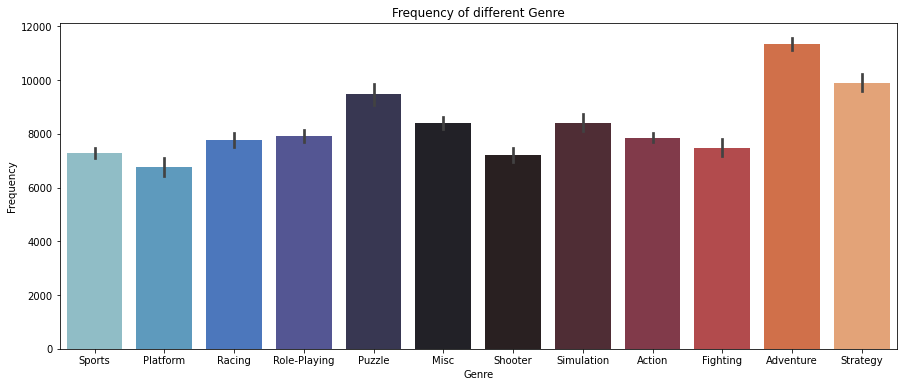

In [ ]:
a=np.arange(1,16292)
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y=a,data=df,palette='icefire')
plt.ylabel('Frequency')
plt.title('Frequency of different Genre')

Visualisasi diatas menunjukan Game petualangan dan strategi adalah yang tertinggi dalam kumpulan data

--------------------------------------------------------------------------------------------------------

Penjualan Global selama bertahun-tahun

Text(0.5, 1.0, 'Global Sales over the years')

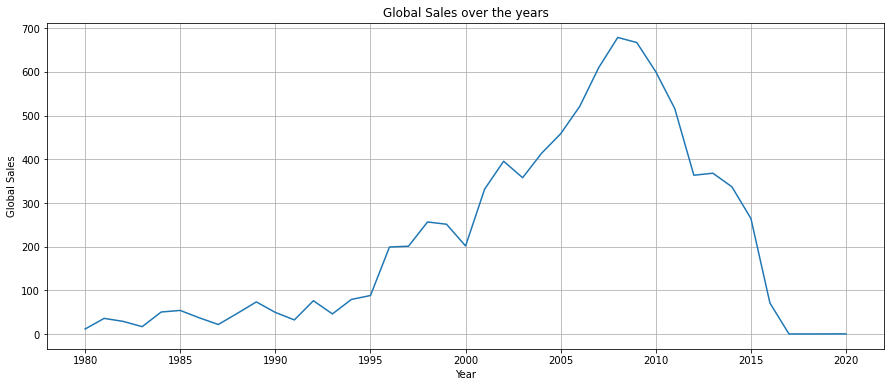

In [ ]:
ax=plt.figure(figsize=(15,6))
df.groupby(['Year'])['Global_Sales'].sum().plot()
plt.grid()
plt.ylabel('Global Sales')
plt.title('Global Sales over the years')

Highest sales have been recorded from 2007 to 2010

--------------------------------------------------------------------------------------------------------

Penjualan game di berbagai platform secara global

Text(0.5, 1.0, 'Sales of games in different platforms globally')

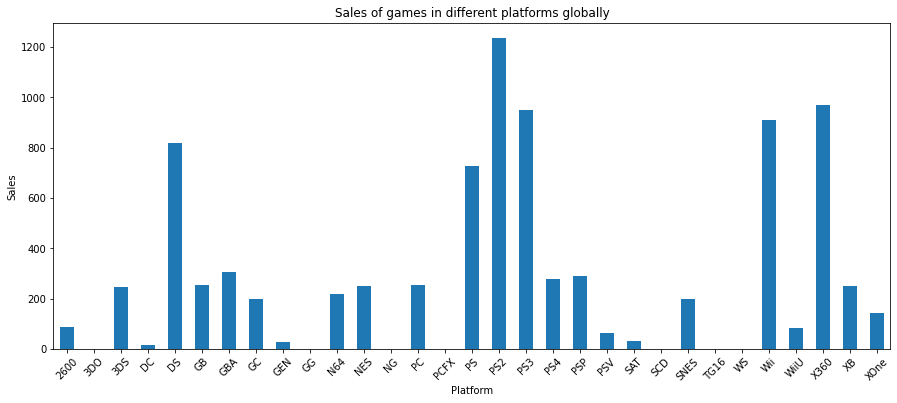

In [ ]:
ax=plt.figure(figsize=(15,6))
df.groupby(['Platform'])['Global_Sales'].sum().plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Sales')
plt.title('Sales of games in different platforms globally')

PS2 telah mencatat penjualan tertinggi secara global

--------------------------------------------------------------------------------------------------------

Genre game yang paling banyak dirilis dalam satu tahun

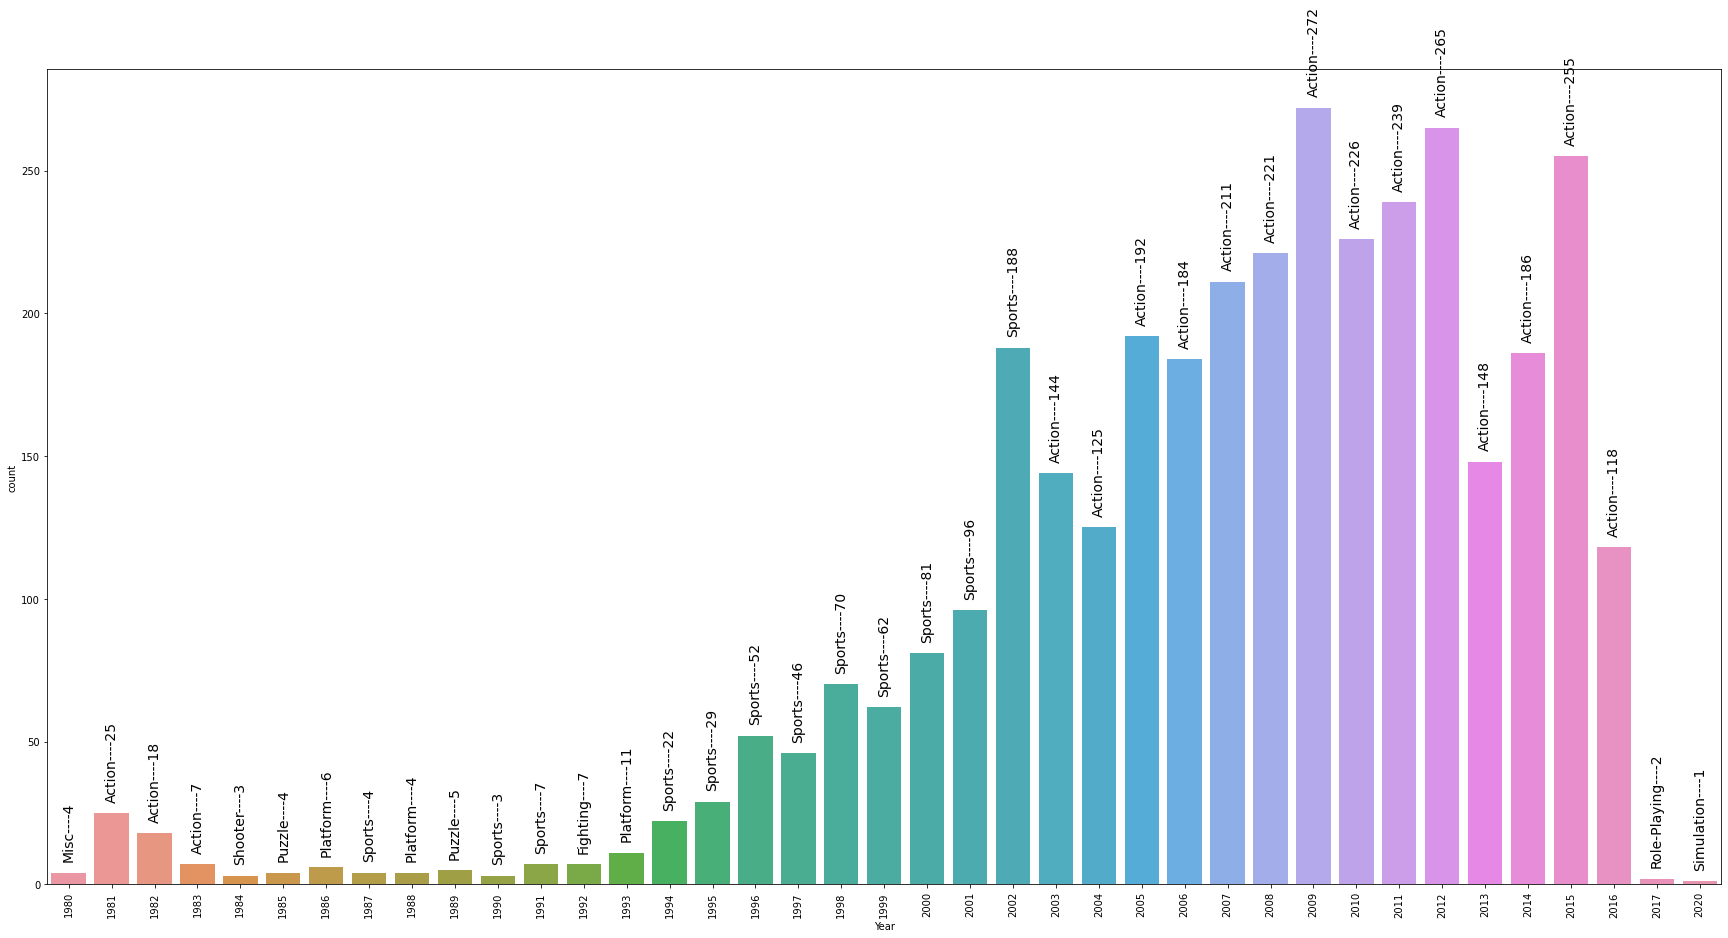

In [ ]:
year_max_df = df.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
genre = year_max_genre['Genre'].values

plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.show()

Game Aksi 272 2009 dan Aksi 266 2012 dirilis

--------------------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


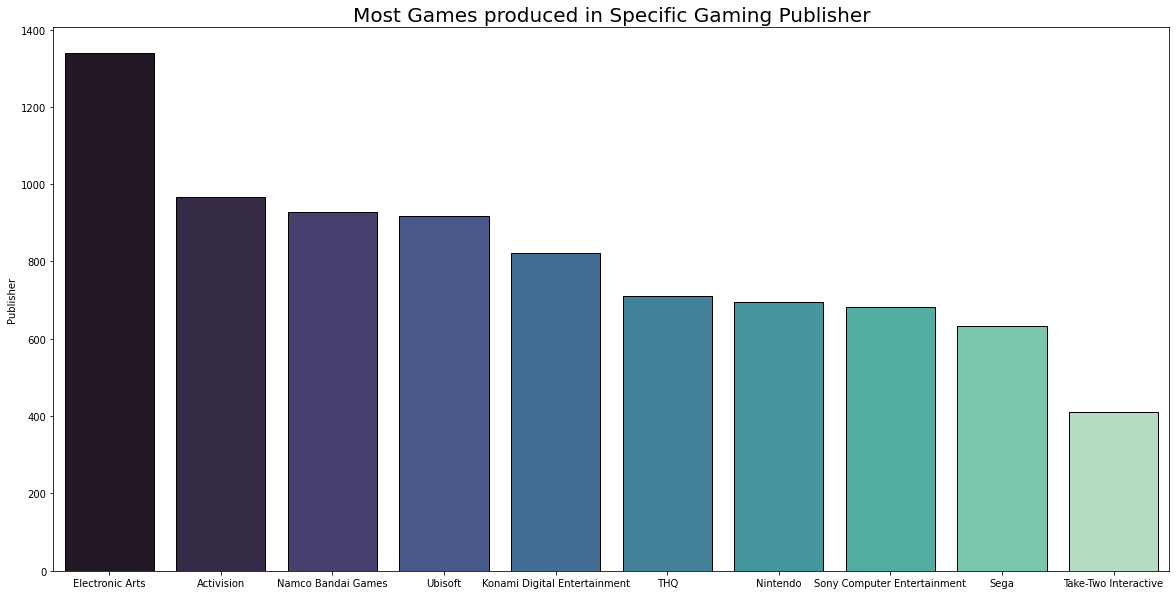

In [ ]:
top10=df["Publisher"].value_counts().index
plt.figure(figsize = (20,10))
sns.barplot(top10[:10], df["Publisher"].value_counts().iloc[:10]
           ,palette='mako'
           ,edgecolor='black'
           )
plt.title("Most Games produced in Specific Gaming Publisher",fontsize=20)
plt.show()

10 Penerbit teratas secara berurutan dan terbanyak adalah Electronic Arts

--------------------------------------------------------------------------------------------------------

Genre game yang paling banyak terjual dalam satu tahun

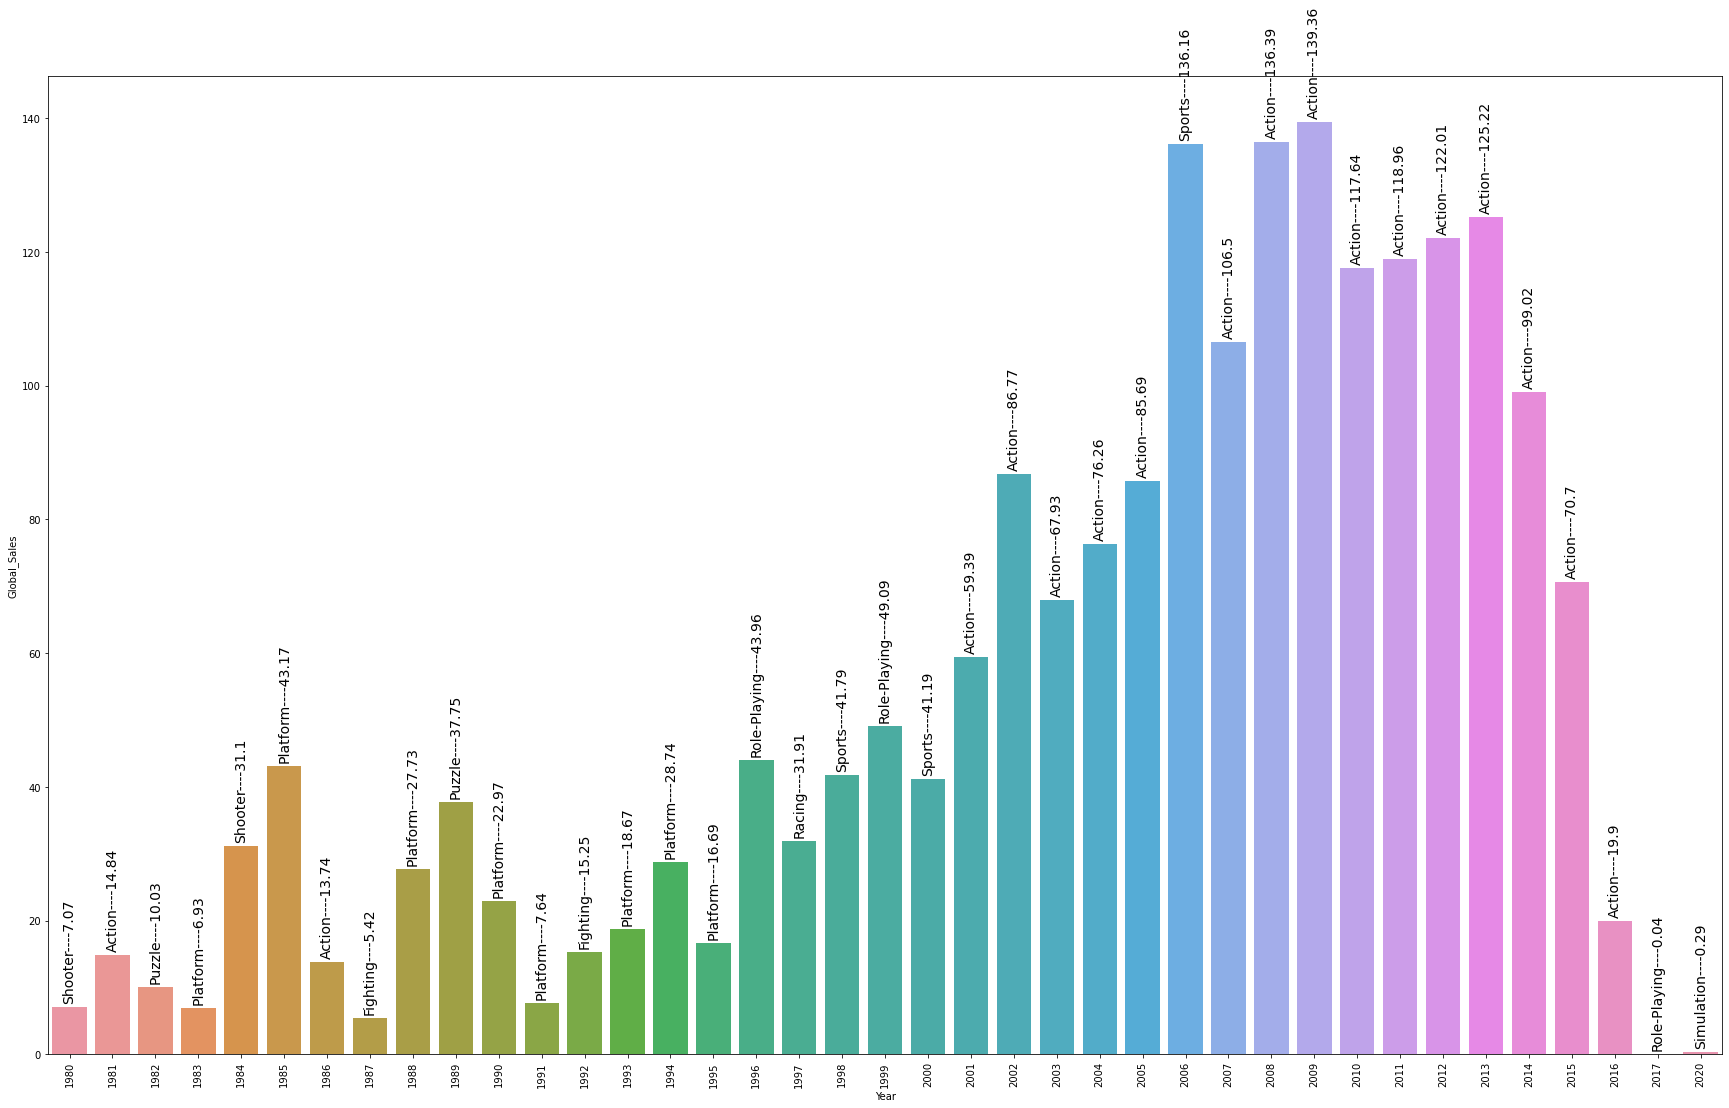

In [ ]:
year_sale_dx = df.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
genre = year_sale_max['Genre']
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

Aksi 2009 adalah 139,36 juta dan Aksi 2008 adalah 136,39 juta

--------------------------------------------------------------------------------------------------------

Distribusi 50 Game Terlaris menurut Penerbit

In [ ]:
Top50byPublisher = df.nlargest(50, 'Global_Sales')[['Global_Sales', 'Name', 'Publisher']]
Top50byPublisher = Top50byPublisher.groupby(pd.Grouper(key='Publisher')).size().reset_index(name='Number of Games')
Top50byPublisher

,Publisher,Number of Games
0,Nintendo,32
1,Microsoft Game Studios,2
2,Take-Two Interactive,6
3,Sony Computer Entertainment,2
4,Activision,8


--------------------------------------------------------------------------------------------------------

Perbandingan penjualan menurut genre

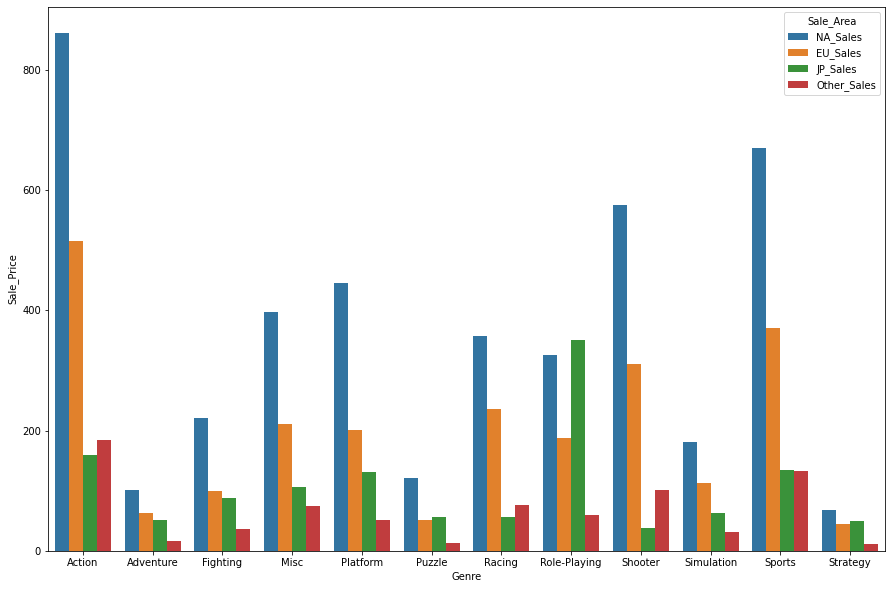

In [ ]:
comp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

dari hasil diatas, Action Sports and Shooter memiliki penjualan yang banyak dibandingkan dengan yang lain. dan Amerika Utara (NA_sales) memiliki penjualan yang tinggi sepanjang waktu. Sepertinya mereka paling menyukai video game

--------------------------------------------------------------------------------------------------------

Total keuntungan menurut wilayah

In [ ]:
top_sale_reg = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


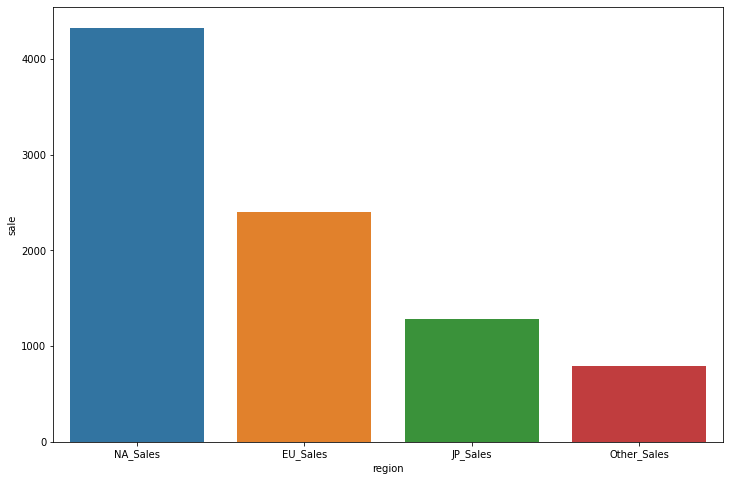

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

([<matplotlib.patches.Wedge at 0x7efefa7aaed0>,
 [Text(-1.0995946696115964, 0.029859044890360037, 'NA_Sales'),
  Text(0.7922706574673692, -0.7630905616741847, 'EU_Sales'),
  Text(0.9378314250625531, 0.5748671308790761, 'JP_Sales'),
  Text(0.30547029027007794, 1.056734546497991, 'Other_Sales')],
 [Text(-0.5997789106972343, 0.0162867517583782, '49.1%'),
  Text(0.4321476313458377, -0.4162312154586461, '27.3%'),
  Text(0.5115444136704835, 0.3135638895704051, '14.6%'),
  Text(0.1666201583291334, 0.5764006617261768, '9.0%')])

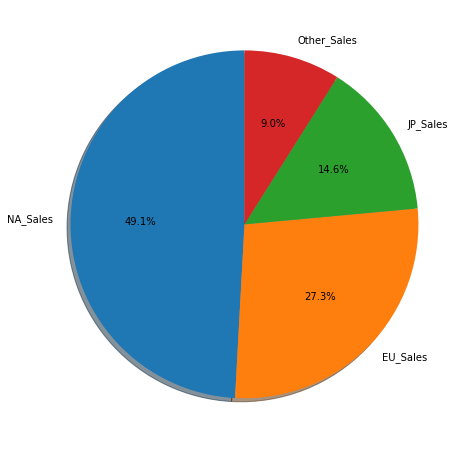

In [ ]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

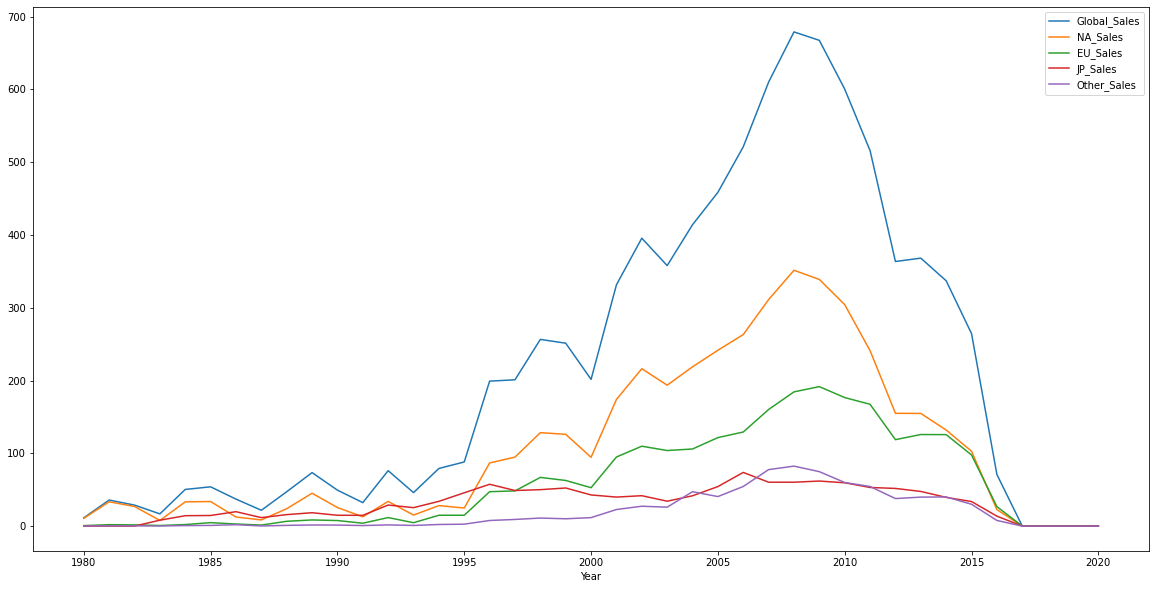

In [ ]:
GSales_Year = df.groupby('Year')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
GSales_Year.plot(figsize = (20,10))

1. sebagian besar penjualan antara 2005 dan 2010
2. penjualan pada tahun 1980 hingga 1990 lebih sedikit

--------------------------------------------------------------------------------------------------------

Perbandingan Penjualan Global Playstation vs PC

In [ ]:
PS = df[df['Platform'] == 'PS'].groupby('Year')['Global_Sales'].sum().reset_index()
PS2 = df[df['Platform'] == 'PS2'].groupby('Year')['Global_Sales'].sum().reset_index()
PS3 = df[df['Platform'] == 'PS3'].groupby('Year')['Global_Sales'].sum().reset_index()
PS4 = df[df['Platform'] == 'PS4'].groupby('Year')['Global_Sales'].sum().reset_index()
PC = df[df['Platform'] == 'PC'].groupby('Year')['Global_Sales'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=PS['Year'], y=PS['Global_Sales'],
                         name="PS Sales",
                         hovertext=PS['Global_Sales']))

fig.add_trace(go.Scatter(x=PS2['Year'], y=PS2['Global_Sales'],
                         name="PS2 Sales",
                         hovertext=PS2['Global_Sales']))

fig.add_trace(go.Scatter(x=PS2['Year'], y=PS2['Global_Sales'],
                         name="PS2 Sales",
                         hovertext=PS2['Global_Sales']))

fig.add_trace(go.Scatter(x=PS3['Year'], y=PS3['Global_Sales'],
                         name="PS3 Sales",
                         hovertext=PS3['Global_Sales']))

fig.add_trace(go.Scatter(x=PS4['Year'], y=PS4['Global_Sales'],
                         name="PS4 Sales",
                         hovertext=PS4['Global_Sales']))

fig.add_trace(go.Scatter(x=PC['Year'], y=PC['Global_Sales'],
                         name="PC Sales",
                         hovertext=PC['Global_Sales']))

fig.update_layout(title_text='Playstation vs PC Global Sales Comparison',
                  title_x=0.5, title_font=dict(size=22))  
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Global Sales (M)")

fig.show()

--------------------------------------------------------------------------------------------------------

# **Dealing with Outliers**

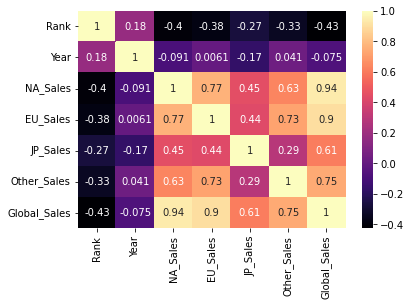

In [ ]:
dfcopy=df.corr() 

sns.heatmap(dfcopy ,annot = True, cmap="magma")

Rank               AxesSubplot(0.125,0.657941;0.133621x0.222059)
Year            AxesSubplot(0.285345,0.657941;0.133621x0.222059)
NA_Sales         AxesSubplot(0.44569,0.657941;0.133621x0.222059)
EU_Sales        AxesSubplot(0.606034,0.657941;0.133621x0.222059)
JP_Sales        AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Other_Sales        AxesSubplot(0.125,0.391471;0.133621x0.222059)
Global_Sales    AxesSubplot(0.285345,0.391471;0.133621x0.222059)
dtype: object

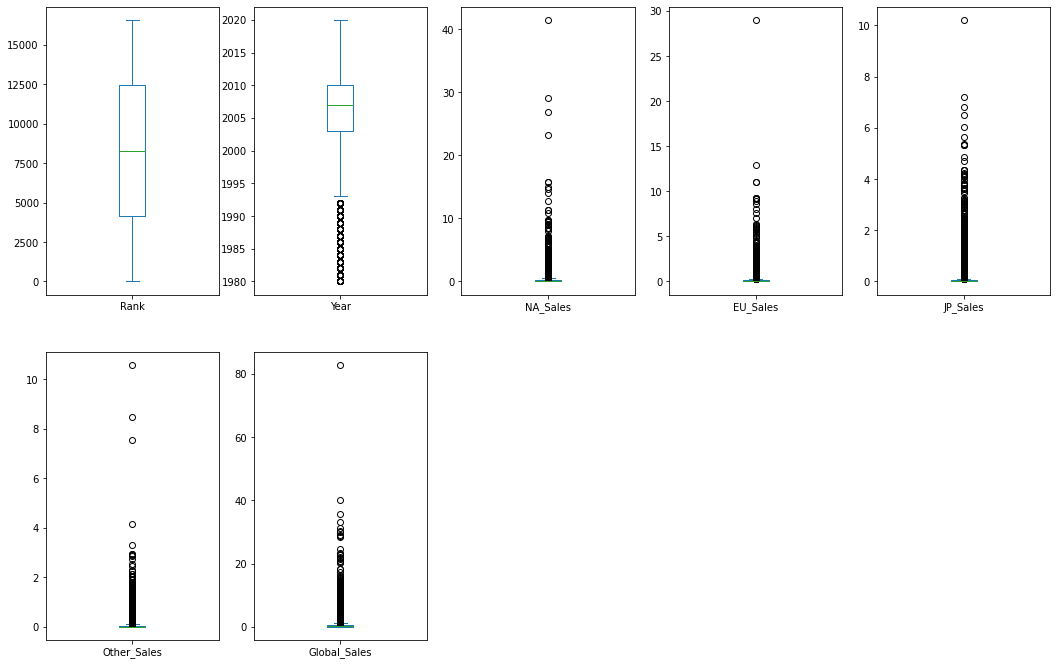

In [ ]:
df.plot(kind = "box" , subplots = True , figsize = (18,18), layout = (3,5))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(0.0, 30.47140487188924)

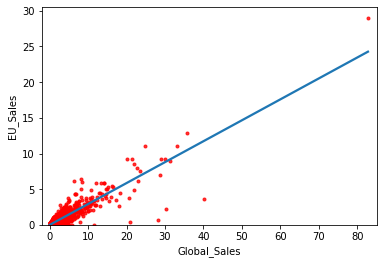

In [ ]:
g = sns.regplot(df.Global_Sales,df.EU_Sales,ci=None,scatter_kws= {"color":"r","s":9});
plt.xlim(-2,85)
plt.ylim(bottom=0)

In [ ]:
df = df.drop([0],axis=0) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(0.0, 13.52411103334368)

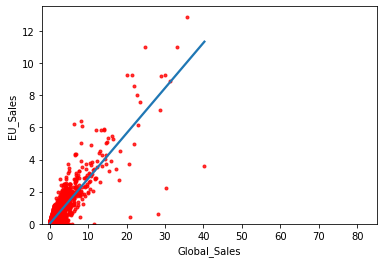

In [ ]:
g = sns.regplot(df.Global_Sales,df.EU_Sales,ci=None,scatter_kws= {"color":"r","s":9});
plt.xlim(-2,85)
plt.ylim(bottom=0)

--------------------------------------------------------------------------------------------------------

## **Label Encoding and prepare X and y**

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [ ]:
from sklearn.preprocessing import LabelEncoder

dff = df.copy()

le = LabelEncoder()

feature = ["Platform", "Genre"]


for col in feature:
    dff[col] = le.fit_transform(df[col])
    

In [ ]:
dff.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,11,1985,4,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,26,2008,6,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,26,2009,10,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,5,1996,7,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,5,1989,5,Nintendo,23.20,2.26,4.22,0.58,30.26


--------------------------------------------------------------------------------------------------------

In [ ]:
X = dff[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values

y = dff['Global_Sales'].values

**Train | Test**

In [ ]:
X.shape

(16290, 6)

In [ ]:
y.shape

(16290,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
from sklearn.preprocessing import RobustScaler
ro = RobustScaler()

In [ ]:
x_train = ro.fit_transform(x_train)
x_test = ro.fit_transform(x_test)

# **Modeling**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,classification_report, roc_curve

## **Decision Tree**

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
regressor.score(x_train,y_train)

0.9999977849831169

In [ ]:
yTreePre= regressor.predict(x_test)

In [ ]:
r2Tree= r2_score(y_test ,yTreePre )
r2Tree

0.957153476768043

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yTreePre, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.04849947541019362


In [ ]:
db = pd.DataFrame({'Actual': y_test, 'Predicted': yTreePre})
db

,Actual,Predicted
0,0.57,0.570000
1,0.02,0.020000
2,0.33,0.320000
3,0.67,0.620000
4,0.15,0.155000
...,...,...
4068,0.05,0.043333
4069,0.23,0.240000
4070,2.20,2.270000
4071,0.19,0.190000


<Figure size 1152x576 with 0 Axes>

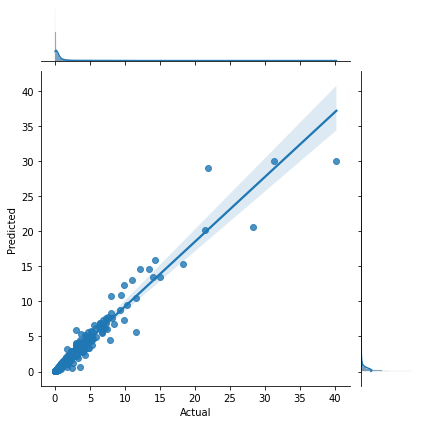

In [ ]:
test = pd.DataFrame({'Predicted':yTreePre,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

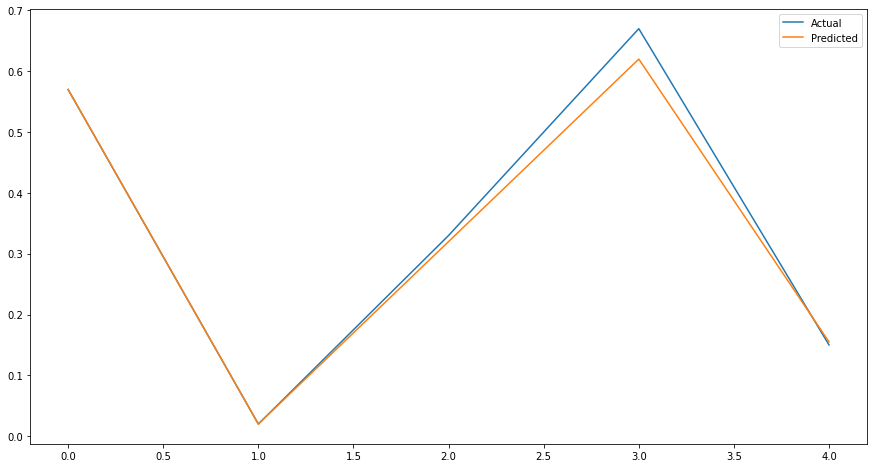

In [ ]:
db1 = db.head()
db1.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
regressor.feature_importances_

array([5.15555321e-04, 4.39465848e-04, 8.46931900e-01, 1.11989937e-01,
       3.17310348e-02, 8.39210727e-03])

--------------------------------------------------------------------------------------------------------

## **Ridge**

In [ ]:
rid = Ridge()
rid.fit(x_train,y_train)

Ridge()

In [ ]:
rid.score(x_train,y_train)

0.9999861192147286

In [ ]:
rid.score(x_test,y_test)

0.999987986050178

In [ ]:
yRidPre = rid.predict(x_test)

In [ ]:
r2Rid = r2_score(y_test ,yRidPre )
r2Rid

0.999987986050178

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yRidPre, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.0029551375102583543


In [ ]:
dbRidge = pd.DataFrame({'Actual': y_test, 'Predicted': yRidPre})
dbRidge

,Actual,Predicted
0,0.57,0.570265
1,0.02,0.020326
2,0.33,0.320226
3,0.67,0.670218
4,0.15,0.150223
...,...,...
4068,0.05,0.040200
4069,0.23,0.240351
4070,2.20,2.200274
4071,0.19,0.190430


In [ ]:
x_test.shape

(4073, 6)

In [ ]:
y_test.shape

(4073,)

<Figure size 1152x576 with 0 Axes>

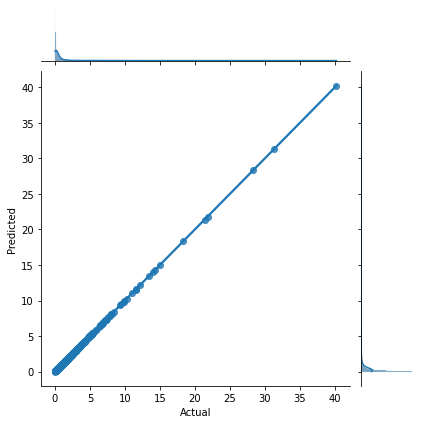

In [ ]:
test = pd.DataFrame({'Predicted':yRidPre,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

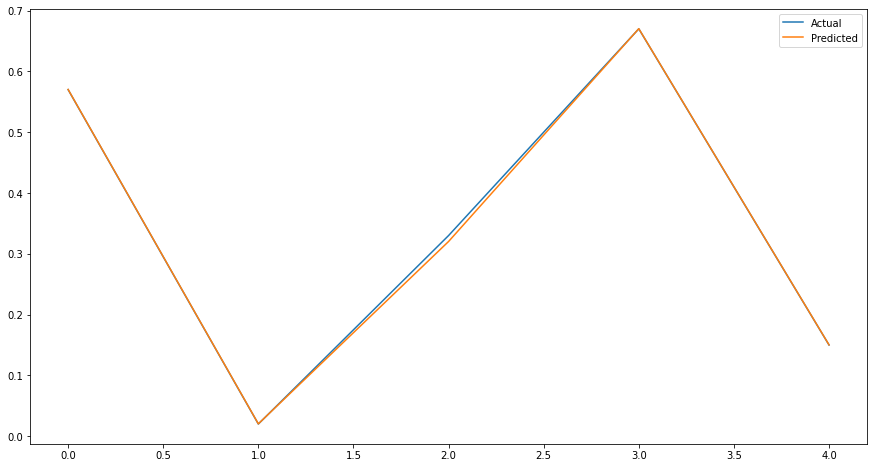

In [ ]:
dbridge1 = dbRidge.head()
dbridge1.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
rid.coef_

array([-1.08639110e-04, -4.71152381e-05,  2.39991637e-01,  1.10008370e-01,
        3.99908258e-02,  3.99685165e-02])

--------------------------------------------------------------------------------------------------------

## **Linier Regression**

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.score(x_train,y_train)

0.9999861192562169

In [ ]:
lr.score(x_test,y_test)

0.9999879850329042

In [ ]:
yLinearPre = lr.predict(x_test)

<Figure size 1152x576 with 0 Axes>

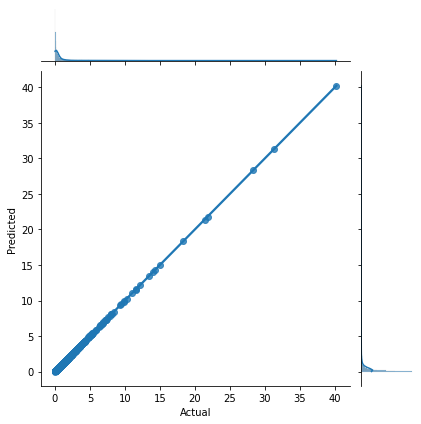

In [ ]:
test = pd.DataFrame({'Predicted':yLinearPre,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yLinearPre, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.0029547715225954007


In [ ]:
dbLinear = pd.DataFrame({'Actual': y_test, 'Predicted': yLinearPre})
dbLinear

,Actual,Predicted
0,0.57,0.570270
1,0.02,0.020324
2,0.33,0.320229
3,0.67,0.670215
4,0.15,0.150223
...,...,...
4068,0.05,0.040197
4069,0.23,0.240351
4070,2.20,2.200280
4071,0.19,0.190427


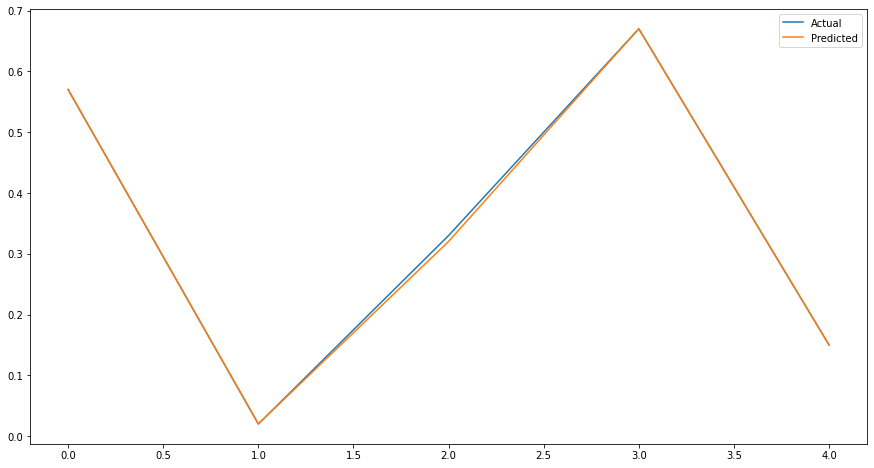

In [ ]:
dbLinear1 = dbLinear.head()
dbLinear1.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
lr.coef_

array([-1.09384339e-04, -4.72731391e-05,  2.39996484e-01,  1.10007377e-01,
        3.99904466e-02,  3.99673977e-02])

--------------------------------------------------------------------------------------------------------

## **Random Forest Regressor**

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train , y_train)

RandomForestRegressor()

In [ ]:
rf.score(x_train,y_train)

0.9971364370022923

In [ ]:
rf.score(x_test,y_test)

0.960809584605558

In [ ]:
yRandomPre= rf.predict(x_test)

In [ ]:
r2Random = r2_score(y_test , yRandomPre)
r2Random

0.960809584605558

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yRandomPre, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.03052262200341933


In [ ]:
dbRandom = pd.DataFrame({'Actual': y_test, 'Predicted': yRandomPre})
dbRandom

,Actual,Predicted
0,0.57,0.568650
1,0.02,0.020000
2,0.33,0.320500
3,0.67,0.644200
4,0.15,0.154477
...,...,...
4068,0.05,0.043365
4069,0.23,0.239800
4070,2.20,2.258800
4071,0.19,0.190000


<Figure size 1152x576 with 0 Axes>

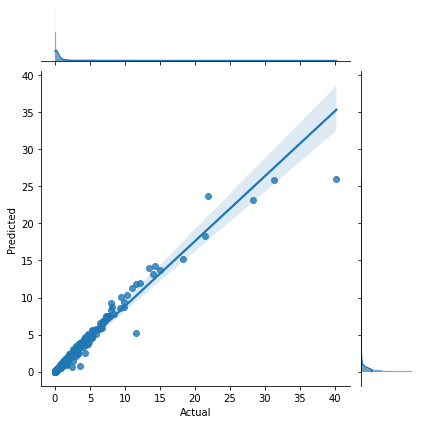

In [ ]:
test = pd.DataFrame({'Predicted':yRandomPre,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

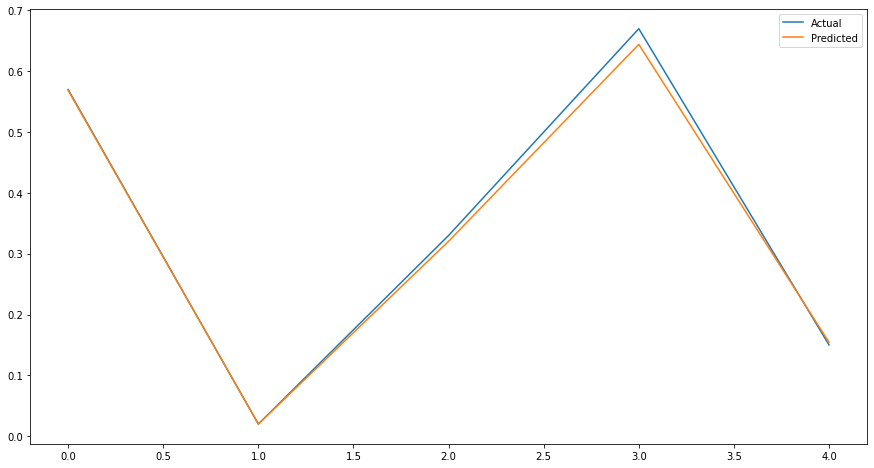

In [ ]:
dbRandom1 = dbRandom.head()
dbRandom1.plot(kind='line',figsize=(15,8))
plt.show()

--------------------------------------------------------------------------------------------------------

## **KNN**

In [ ]:
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
knn.score(x_train,y_train)

0.9830286155722257

In [ ]:
knn.score(x_test , y_test)

0.9134505144593599

In [ ]:
pred = knn.predict(x_test)

r2_knn = r2_score(y_test,pred)
print(r2_knn)

0.9134505144593599


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(pred, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.046915295850724285


In [ ]:
dbKNN = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
dbKNN

,Actual,Predicted
0,0.57,0.560
1,0.02,0.020
2,0.33,0.320
3,0.67,0.578
4,0.15,0.150
...,...,...
4068,0.05,0.022
4069,0.23,0.254
4070,2.20,2.180
4071,0.19,0.190


<Figure size 1152x576 with 0 Axes>

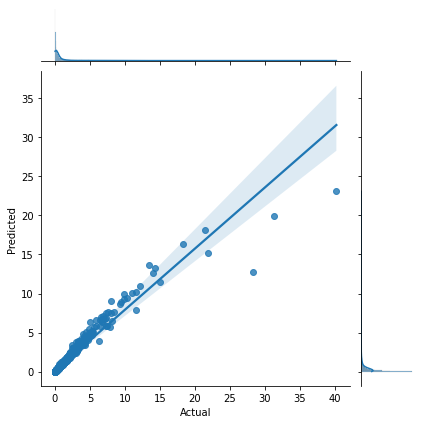

In [ ]:
test = pd.DataFrame({'Predicted':pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

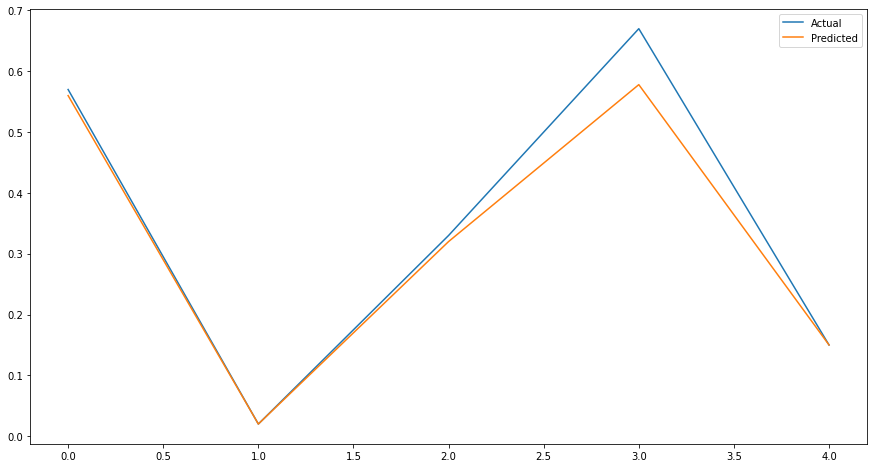

In [ ]:
dbKNN1 = dbKNN.head()
dbKNN1.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
import statsmodels.api as sm
import numpy as np
np.random.seed(1)
m = sm.add_constant(X)
est = sm.OLS(y, m)
est2 = est.fit()
print(est2.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



[ 4.76457202e-04 -9.44528385e-06 -6.76156906e-07  9.99946770e-01
  9.99943041e-01  9.99876334e-01  9.99612604e-01]


In [ ]:
import statsmodels.api as sm
from scipy import stats
m = sm.add_constant(X)
est=sm.OLS(y,m)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.032e+08
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:11:16   Log-Likelihood:                 62487.
No. Observations:               16290   AIC:                        -1.250e+05
Df Residuals:                   16283   BIC:                        -1.249e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      4.638      0.0

# **KESIMPULAN**

1. Kebanyakan Game yang diproduksi di Specific Gaming Platform adalah DS kemudian Ps2
2. Jenis permainan yang paling populer adalah Action kemudian Sports. Terendah adalah Puzzle
3. 10 Penerbit teratas secara berurutan dan terbanyak adalah Electronic Arts
4. Sebagian besar game Diproduksi antara tahun 2002 hingga 2016 sp pada tahun 2010
5. Jenis game yang paling banyak diterbitkan adalah Action
6. Sebagian besar penjualan antara 2005 dan 2010. Jangan sampai penjualan pada 1980 hingga 1990